<a href="https://colab.research.google.com/github/Yutthana-BJ/Project_YB/blob/main/NLP_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn
!pip install nltk
!pip install emoji
!pip install langdetect
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=cc4994d0ff07ac7ea7062d877af158e0ae4585f996e3920e9fe4ebdda7854872
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8

# 1. Get Data
Download the data set from https://www.kaggle.com/datasets/ashishkumarak/amazon-shopping-reviews-daily-updated?resource=download

Then that, save the downloaded data in Google Drive.

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data_set = '/content/drive/MyDrive/Colab Notebooks/DataSet/amazon_reviews.csv.zip'
df = pd.read_csv(data_set)
df

Mounted at /content/drive


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,ce07c326-24b7-4016-ab3a-b98490b6ccb6,Lavinia Nevonga,Great company,5,0,28.11.2.100,2024-06-13 21:05:22,28.11.2.100
1,c3bf6d2e-4a67-4dbe-a274-1fda4648ce31,Richard “Rich” Lehman,Getting refund and deleting account. We didn't...,1,0,28.11.2.100,2024-06-13 20:57:36,28.11.2.100
2,def89d93-b293-4247-bf9f-d55d6a8feca3,chandler clark,"I have had Amazon for a long time, but now I s...",2,0,28.11.2.100,2024-06-13 20:55:10,28.11.2.100
3,436aa710-27fe-453e-88fd-2546de90ab63,Tony Codallo,Easy to use,5,0,28.11.2.100,2024-06-13 20:54:43,28.11.2.100
4,f0d74c55-9aa5-41ff-8489-9b04e2b3f1bc,Atika Lee,"I am very happy to shop in Amazon, I trust all...",5,0,28.11.2.100,2024-06-13 20:48:32,28.11.2.100
...,...,...,...,...,...,...,...,...
53042,ac82191a-e776-42a0-8e30-91eabb763968,Mary Mora,Amazon Smile donates. Make sure you get all se...,5,0,26.1.2.100,2023-01-16 06:12:14,26.1.2.100
53043,3aa6af38-b044-4257-9cf3-b94c437da0ef,Marie Elliott,After having problems with the app and having ...,5,1,22.18.0.100,2021-09-24 12:01:29,22.18.0.100
53044,727ec38a-c633-48f4-a302-66e52740a43c,Dan Preston,"Used to be great. Got greedy, they ruined the ...",1,0,26.9.0.100,2023-05-15 18:27:24,26.9.0.100
53045,615a9643-cd36-4010-9a81-8763bac11ddf,Jhosh,New search bar location sucks. At least give m...,2,0,26.12.0.100,2023-06-11 15:24:08,26.12.0.100


# 2. Data Preparation

In [3]:
df = df.drop(['reviewId', 'userName', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'appVersion'], axis=1)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52720 entries, 0 to 53046
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  52718 non-null  object
 1   score    52720 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [4]:
df = df.dropna(subset=['content'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52718 entries, 0 to 53046
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  52718 non-null  object
 1   score    52718 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


# 2.2 Transliter

In [5]:
from langdetect import detect, detect_langs
from collections import Counter

def detect_language(content):
    try:
        return detect(content)
    except:
        return 'unknown'

df['language'] = df['content'].apply(detect_language)
df

,content,score,language
0,Great company,5,en
1,Getting refund and deleting account. We didn't...,1,en
2,"I have had Amazon for a long time, but now I s...",2,en
3,Easy to use,5,en
4,"I am very happy to shop in Amazon, I trust all...",5,en
...,...,...,...
53042,Amazon Smile donates. Make sure you get all se...,5,en
53043,After having problems with the app and having ...,5,en
53044,"Used to be great. Got greedy, they ruined the ...",1,en
53045,New search bar location sucks. At least give m...,2,en


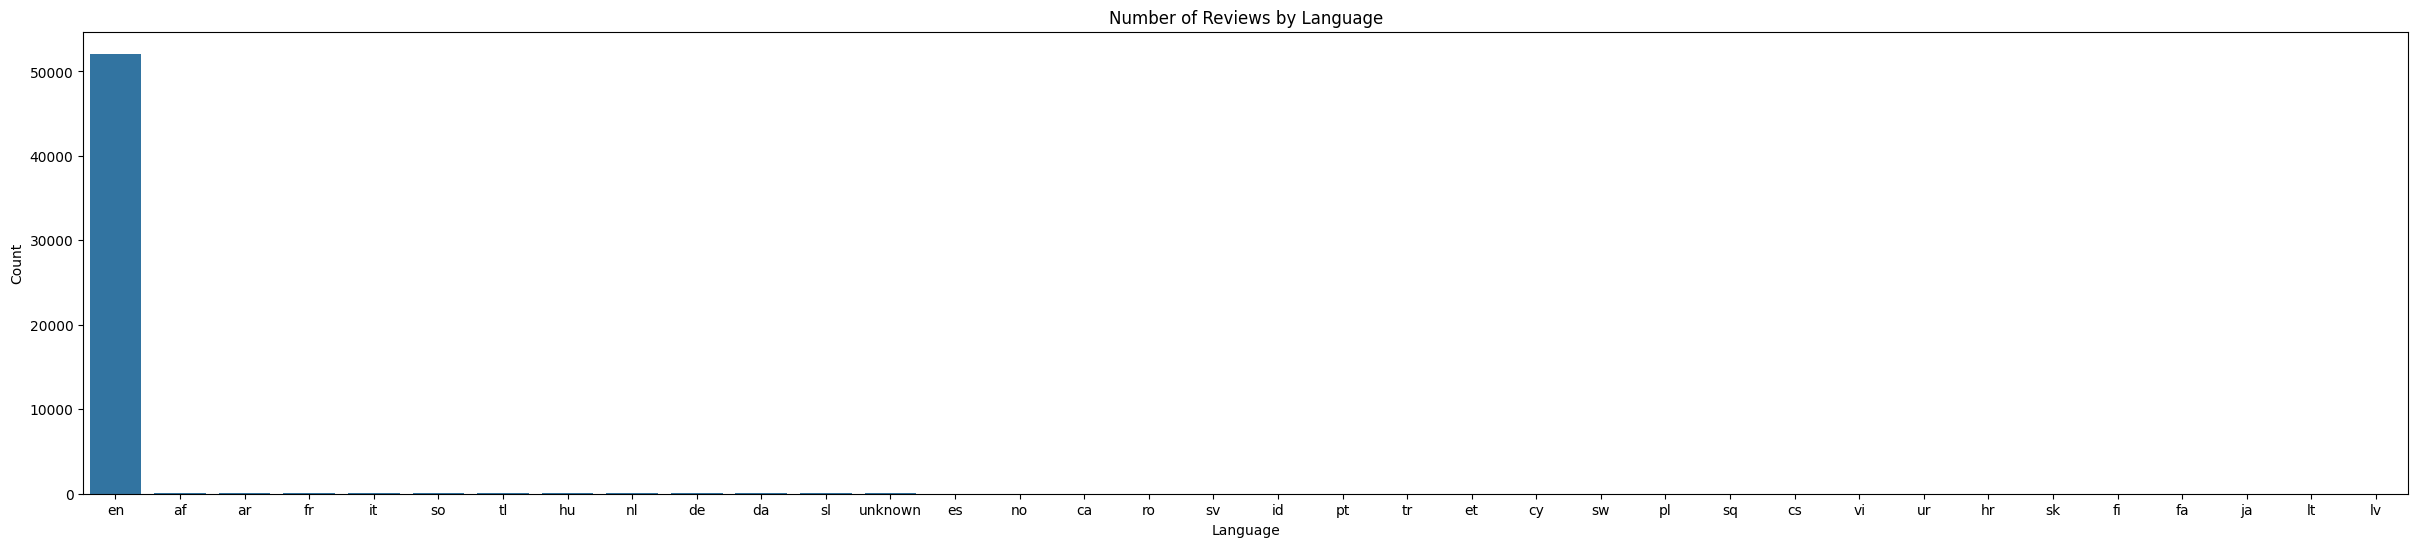

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

language_counts = Counter(df['language'])
language_df = pd.DataFrame(language_counts.items(), columns=['language', 'count'])
language_df = language_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(30, 6))
sns.barplot(data=language_df, x='language', y='count')
plt.title('Number of Reviews by Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

In [13]:
df = df[df['language'] == 'en']
df = df.drop(['language'], axis=1)

print(f"Total Reviews: {len(df)}")
score_group = df.groupby("score").count().reset_index()
score_group['proportion'] = score_group['content'] / score_group['content'].sum()
score_group

KeyError: 'language'

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['content'], df['score'], test_size=0.2, random_state=44)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from nltk.tokenize import word_tokenize

# Create a pipeline for text classification.
score_classifier = Pipeline([ ("vect", CountVectorizer(tokenizer=word_tokenize, ngram_range=(1, 2))),
                              ("tfidf", TfidfTransformer()),
                              ("clf", LinearSVC())])

In [43]:
# Train a classifier
import nltk
nltk.download('punkt')

score_classifier.fit(X_train, Y_train)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function word_tokenize at 0x79e193a05f30>)),
                ('tfidf', TfidfTransformer()), ('clf', LinearSVC())])

In [46]:
Y_pred = score_classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, digits=4))

[[4585  271   86   17   51]
 [1002  170  101   22   37]
 [ 610  124  139   77   75]
 [ 188   55   69  147  234]
 [ 177   20   30   72 2060]]
              precision    recall  f1-score   support

           1     0.6987    0.9152    0.7924      5010
           2     0.2656    0.1276    0.1724      1332
           3     0.3271    0.1356    0.1917      1025
           4     0.4388    0.2121    0.2860       693
           5     0.8384    0.8733    0.8555      2359

    accuracy                         0.6815     10419
   macro avg     0.5137    0.4528    0.4596     10419
weighted avg     0.6211    0.6815    0.6347     10419



In [48]:
from gradio.components import Textbox, Label
from gradio import Interface

def predict_score(review: str) -> str:
  """Predict a score of a given text review."""
  predictions = score_classifier.predict([review])
  prediction = predictions[0]
  return str(prediction)

# Create a gradio interface
score_interface = Interface( fn = predict_score,
                              inputs = Textbox(label="Review"),
                              outputs = Label(label="Predicted Score"))
# Launch the webapp
score_interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9eb896ffda562283f9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
